In [1]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/haar_data/mean_i3'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/haar_data/data_i3/L{L},T{T},dt{dt:.1f},p{p},dir{d},s{sss}_i3.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}_i3.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}_i3.npy"), S_var)

In [3]:
for L in [6, 7, 8]:
    for T in [10.0*L]:
        for p in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
            for d in ["Z"]:
                for dt in[1.0]:
                    average_data(L,T,dt,p,d,200,10*L)

In [4]:
import os
import re
import shutil

# Base directory containing your .npy files
base_dir = '/Users/uditvarma/Documents/haar_data/mean_i3'

# Pattern to extract L from filenames like: Emean_L8,T300,dt1.0,p0.4.npy
pattern = re.compile(r'^[^_]+_L(\d+),T.*\.npy$')

# List all files
all_files = os.listdir(base_dir)

# Loop through files
for fname in all_files:
    match = pattern.match(fname)
    if match:
        L = match.group(1)  # e.g., "8", "12", ...
        L_dir = os.path.join(base_dir, f'L_{L}')
        os.makedirs(L_dir, exist_ok=True)

        src = os.path.join(base_dir, fname)
        dst = os.path.join(L_dir, fname)
        shutil.move(src, dst)
        print(f"Moved {fname} → {L_dir}")

Moved Emean_L6,T60.0,dt1.0,p0.1_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_6
Moved Emean_L8,T80.0,dt1.0,p0.8_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_8
Moved Evar_L7,T70.0,dt1.0,p1.0_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_7
Moved Evar_L7,T70.0,dt1.0,p0.0_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_7
Moved Emean_L8,T80.0,dt1.0,p0.4_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_8
Moved Evar_L6,T60.0,dt1.0,p0.5_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_6
Moved Evar_L6,T60.0,dt1.0,p0.9_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_6
Moved Emean_L7,T70.0,dt1.0,p0.8_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_7
Moved Emean_L7,T70.0,dt1.0,p0.4_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_7
Moved Evar_L8,T80.0,dt1.0,p1.0_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_8
Moved Evar_L8,T80.0,dt1.0,p0.0_i3.npy → /Users/uditvarma/Documents/haar_data/mean_i3/L_8
Moved Evar_L6,T6

In [5]:
import os
import shutil

# Base directory containing L_x folders
base_dir = '/Users/uditvarma/Documents/haar_data/mean_i3'

# List of L values
L_list = [6, 7, 8, 9, 10, 11]

for L in L_list:
    folder_name = f'L_{L}'
    source_dir = os.path.join(base_dir, folder_name)
    target_dir = os.path.join(source_dir, 'var')

    # Skip if the source directory doesn't exist
    if not os.path.isdir(source_dir):
        print(f"Skipping missing folder: {source_dir}")
        continue

    # Create 'var' subfolder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move files starting with "Evar"
    for filename in os.listdir(source_dir):
        if filename.startswith('Evar'):
            src_path = os.path.join(source_dir, filename)
            dst_path = os.path.join(target_dir, filename)
            shutil.move(src_path, dst_path)
            print(f"Moved {filename} to {target_dir}")

Moved Evar_L6,T60.0,dt1.0,p0.5_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.9_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.7_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.3_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.1_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.4_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.8_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.6_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.2_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.0_i3.npy to /Users/uditvarma/Documents/haar_data/mean_i3/L_6/var
Moved Evar_L6,T60.0,dt1.0,p1.0_i3.npy to /Users/uditvarma/Do

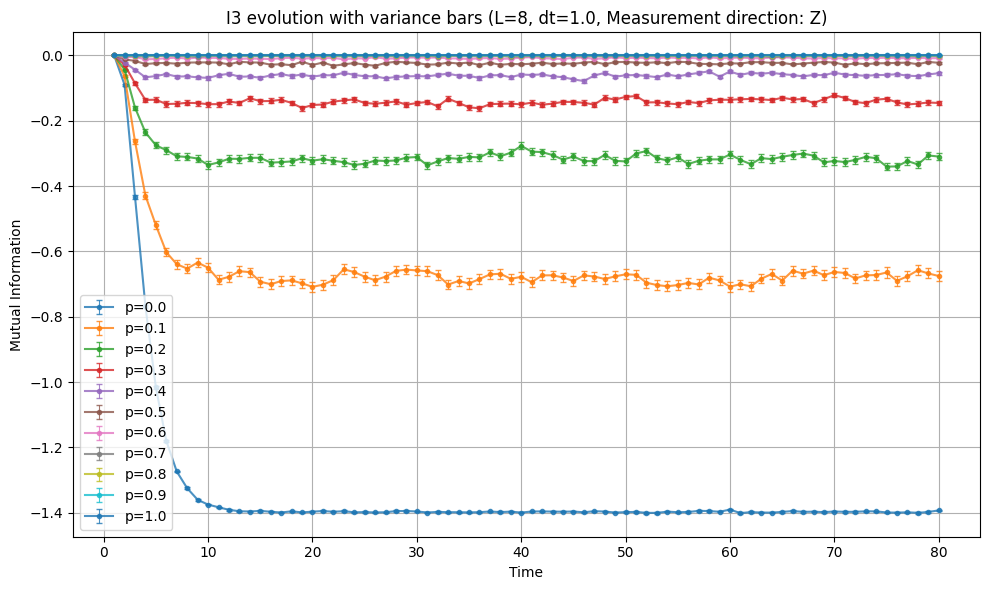

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/haar_data/mean_i3/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_i3)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.title('I3 evolution with variance bars (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

In [ ]:
using Glob, Printf

# --- parameters (same as your run) ---
Ls = [6, 7, 9, 10, 11, 12]
dts = [1.0]
ps = 0.0:0.1:1.0
shots = 1:500
Tfactor(L) = 10L  # total time scaling rule

# --- expected jobs ---
expected_jobs = [(L, Tfactor(L), dt, p) for L in Ls for dt in dts for p in ps]
expected_total = length(expected_jobs) * length(shots)

println("Total expected output files = $expected_total")

# --- function to parse filenames ---
function parse_filename(fname::String)
    # assumes name like: L8,T80.0,dt1.0,p0.0,dirZ2,s1_hc.npy
    m = match(r"L(\d+),T([\d\.]+),dt([\d\.]+),p([\d\.]+)", fname)
    if m === nothing
        return nothing
    end
    L  = parse(Int, m.captures[1])
    T  = parse(Float64, m.captures[2])
    dt = parse(Float64, m.captures[3])
    p  = parse(Float64, m.captures[4])
    return (L, T, dt, p)
end

# --- scan folder ---
function check_progress(folder::String)
    files = glob("*.npy", folder)
    parsed = filter(!isnothing, parse_filename.(basename.(files)))
    counts = Dict{Tuple{Int,Float64,Float64,Float64}, Int}()
    for job in parsed
        counts[job] = get(counts, job, 0) + 1
    end

    total_done = sum(values(counts))
    println("Progress: $total_done / $expected_total files done (",
            @sprintf("%.2f", 100 * total_done / expected_total), "%)")

    # show breakdown per (L,p) if useful
    for job in sort(collect(keys(counts)))
        println("  Job $job : $(counts[job]) / $(length(shots)) shots")
    end
end

Total expected output files = 33000


check_progress (generic function with 1 method)

In [ ]:
check_progress("/Users/uditvarma/Documents/haar_data/data_i3")

Progress: 19071 / 33000 files done (57.79%)
  Job (6, 60.0, 1.0, 0.0) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.1) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.2) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.3) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.4) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.5) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.6) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.7) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.8) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.9) : 500 / 500 shots
  Job (6, 60.0, 1.0, 1.0) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.0) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.1) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.2) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.3) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.4) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.5) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.6) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.7) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.8) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.9) : 500 / 500 shots
  Job (7, 70.0, 1.0, 1.0) : 500 

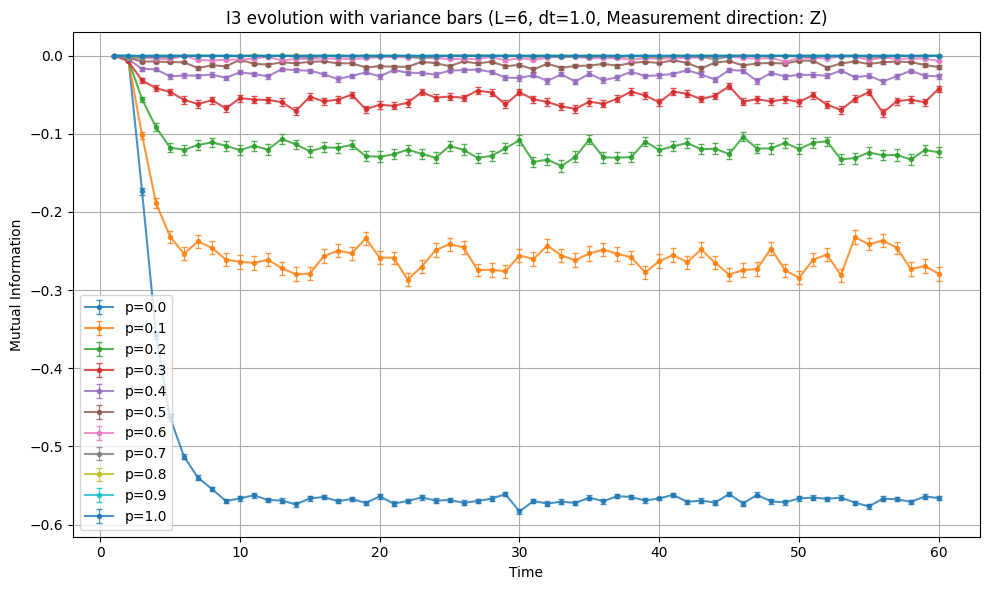

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/haar_data/mean_i3/L_6"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_i3)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.title('I3 evolution with variance bars (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

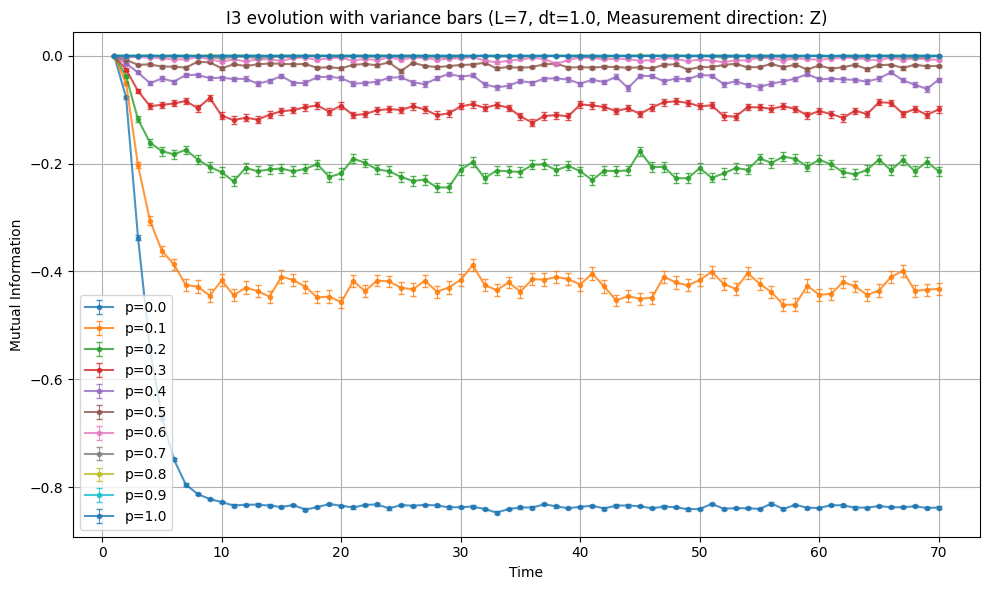

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/haar_data/mean_i3/L_7"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_i3)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.title('I3 evolution with variance bars (L=7, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

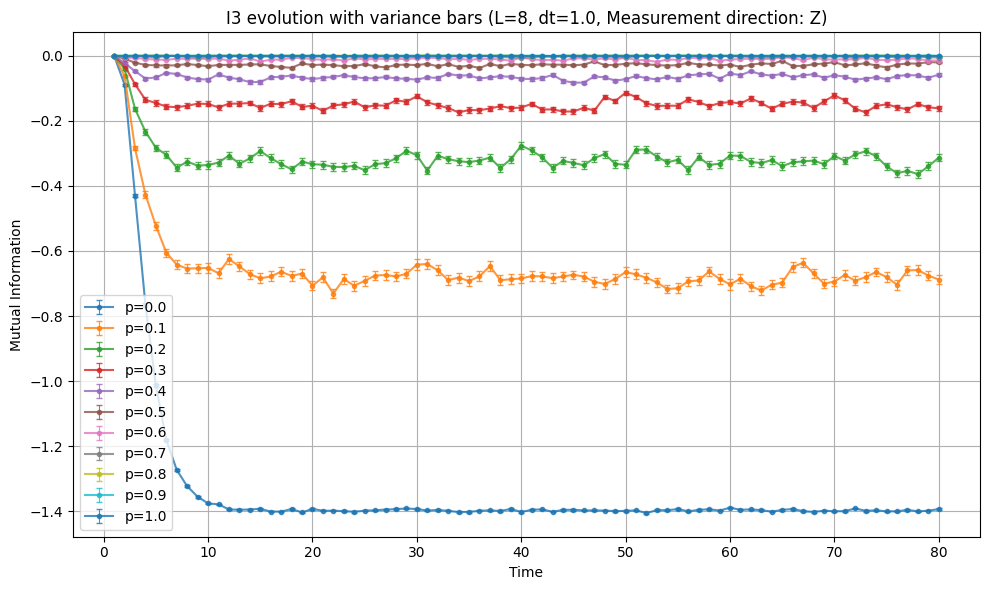

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/haar_data/mean_i3/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_i3)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Mutual Information')
plt.title('I3 evolution with variance bars (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()